# OSMnx tutorial

## Resources:
- [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.simplification.consolidate_intersections)
- [link 1](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
- [link 2](https://geoffboeing.com/2020/06/whats-new-with-osmnx/)
- [link 3](https://geoffboeing.com/tag/tutorial/)

## Invoke libraries

In [141]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import earthpy as et
import json
import o

## Visualize maps

Plot with OSM & remove interstitial nodes
- [citation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.simplify.simplify_graph)

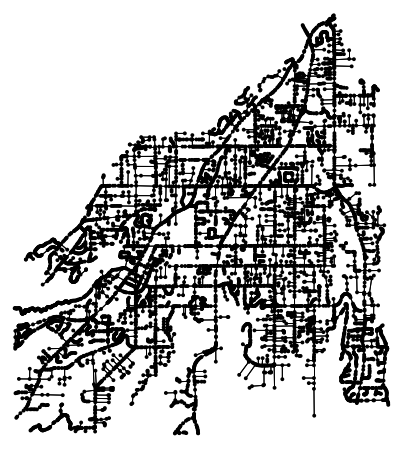

In [2]:
#cmap = plt.cm.get_cmap('viridis')

map = ox.graph_from_place('Paradise, California',
                          network_type='drive',
                          simplify=False) # Simplify a graph’s topology by removing interstitial nodes.

ox.plot_graph(map,
             bgcolor='#FFFFFF',
             edge_color='#000000',
             node_color='#000000');

In [3]:
# # show the simplified network with edges colored by length
# ec = ox.plot.get_edge_colors_by_attr(map_cons_speed, attr='length', cmap='plasma_r')
# fig, ax = ox.plot_graph(map, node_color='w', node_edgecolor='w', node_size=1,
#                         edge_color=ec, edge_linewidth=3,bgcolor='#FFFFFF')

Plot with matplotlib

In [4]:
#fig, ax = ox.plot_graph(map)
#plt.tight_layout()

### Consolidate intersections to compensate for overcounting 
- [citation](https://geoffboeing.com/2020/06/whats-new-with-osmnx/)

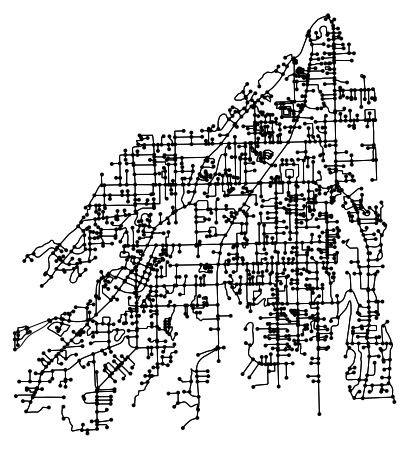

In [5]:
mapCons = ox.project_graph(ox.graph_from_place('Paradise, California', network_type='drive'))
map_cons = ox.consolidate_intersections(mapCons,
                                        tolerance=10,
                                        rebuild_graph=True,
                                        dead_ends=True)
ox.plot_graph(map_cons,
             bgcolor='#FFFFFF',
             edge_color='#000000',
             node_color='#000000');

## Basic statistics

In [6]:
# map = ox.graph_from_place('Pittsburg, Pennsylvania', network_type='drive')
basic_stats = ox.basic_stats(map)
basic_stats

{'n': 8737,
 'm': 17826,
 'k_avg': 4.080576857044752,
 'intersection_count': 7975,
 'streets_per_node_avg': 2.0501316241272747,
 'streets_per_node_counts': {0: 0, 1: 762, 2: 6898, 3: 954, 4: 123},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08721529128991645,
  2: 0.7895158521231544,
  3: 0.10919079775666705,
  4: 0.014078058830262103},
 'edge_length_total': 606099.2269999946,
 'edge_length_avg': 34.00085420172751,
 'street_length_total': 304043.7839999997,
 'street_length_avg': 33.98656203890003,
 'street_segments_count': 8946,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0000000084366163,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Extended statistics

In [7]:
#extended_stats = ox.extended_stats(map, bc=True)

### Extract edge/street speeds

- [citation](https://networkx.org/documentation/latest/auto_examples/geospatial/plot_osmnx.html)

In [8]:
# impute edge (driving) speeds and calculate edge traversal times
map_cons_speed = ox.add_edge_speeds(map_cons)
map_cons_speed = ox.add_edge_travel_times(map_cons_speed)

### Extract nodes (intersections) and edges (streets)

In [9]:
# you can convert MultiDiGraph to/from geopandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(map_cons_speed)
map_cons_speed = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=map_cons_speed.graph)
gdf_nodes.shape, gdf_edges.shape
# nodes, edges = ox.graph_to_gdfs(map_cons)
# nodes.shape, edges.shape

((1788, 8), (3982, 13))

- **Count types of roads**

In [10]:
print(gdf_edges['highway'].value_counts())

residential                3269
tertiary                    440
secondary                   230
unclassified                 26
trunk                        15
[residential, tertiary]       2
Name: highway, dtype: int64


Edges, from node u to v (see this [link](https://osmnx.readthedocs.io/en/stable/) for more detail)

In [11]:
gdf_edges

osmid              name      highway  oneway   length  \
u      v    key                                                             
0      2    0    10290687         York Road  residential   False   64.271   
1      5    0    10297459      Diduca Court  residential   False  110.959   
       12   0    10295615      Wayland Road  residential   False  588.100   
       2    0    10295615      Wayland Road  residential   False  112.158   
2      0    0    10290687         York Road  residential   False   64.271   
...                   ...               ...          ...     ...      ...   
1785   931  0    10295016        Ragan Lane  residential   False  122.537   
1621-0 1550 0    10287838               NaN  residential   False   37.905   
1621-1 1572 0    10289809               NaN  residential   False   49.240   
709-0  693  0    10292743  Golden Oaks Road  residential   False  146.313   
709-1  694  0    10289997               NaN  residential   False   75.184   

                                                          geometry  \
u      v    key                                                      
0      2    0    LINESTRING (616678.276 4398207.926, 616677.302...   
1      5    0    LINESTRING (616566.853 4398274.510, 616587.833...   
       12   0    LINESTRING (616566.853 4398274.510, 616558.936...   
       2    0    LINESTRING (616566.853 4398274.510, 616574.769...   
2      0    0    LINESTRING (616677.302 4398272.079, 616678.276...   
...                                                            ...   
1785   931  0    LINESTRING (620217.526 4401892.144, 620215.353...   
1621-0 1550 0    LINESTRING (620952.412 4404719.373, 620950.481...   
1621-1 1572 0    LINESTRING (620956.616 4404735.204, 620959.760...   
709-0  693  0    LINESTRING (619504.259 4401673.619, 619437.265...   
709-1  694  0    LINESTRING (619505.337 4401653.874, 619510.079...   

                 u_original  v_original  speed_kph  travel_time maxspeed  ref  \
u      v    key                                                                 
0      2    0      86435684    86435682       40.2          5.8      NaN  NaN   
1      5    0      86556378    86605677       40.2          9.9      NaN  NaN   
       12   0      86556378    86556473       40.2         52.7      NaN  NaN   
       2    0      86556378    86435682       40.2         10.0      NaN  NaN   
2      0    0      86435682    86435684       40.2          5.8      NaN  NaN   
...                     ...         ...        ...          ...      ...  ...   
1785   931  0      86540224    86518749       40.2         11.0      NaN  NaN   
1621-0 1550 0      86376916    86376907       40.2          3.4      NaN  NaN   
1621-1 1572 0      86413669    86376922       40.2          4.4      NaN  NaN   
709-0  693  0      86479783    86479779       40.2         13.1      NaN  NaN   
709-1  694  0      86416087    86416075       40.2          6.7      NaN  NaN   

                lanes  
u      v    key        
0      2    0     NaN  
1      5    0     NaN  
       12   0     NaN  
       2    0     NaN  
2      0    0     NaN  
...               ...  
1785   931  0     NaN  
1621-0 1550 0     NaN  
1621-1 1572 0     NaN  
709-0  693  0     NaN  
709-1  694  0     NaN  

[3982 rows x 13 columns]

> [note](https://osmnx.readthedocs.io/en/stable/) that `u` and `v` are nodes linked by a given edge such that a one-way street/edge will connect node `u` and `v` while a "bidirectional street will be represented with two reciprocal directed edges (with identical geometries): one from node u to node v and another from v to u, to represent both possible directions of flow" 

In [12]:
gdf_nodes

osmid_original             y              x  street_count         lon  \
osmid                                                                          
0            86435684  4.398208e+06  616678.276142           1.0 -121.638553   
1            86556378  4.398275e+06  616566.852713           3.0 -121.639841   
2            86435682  4.398272e+06  616677.301700           4.0 -121.638553   
3            86471917  4.398316e+06  618587.235226           3.0 -121.616265   
4            86477502  4.398330e+06  617069.208938           1.0 -121.633971   
...               ...           ...            ...           ...         ...   
1785         86540224  4.401892e+06  620217.526359           1.0 -121.596594   
1621-0       86376916  4.404719e+06  620952.411782           1.0 -121.587497   
1621-1       86413669  4.404735e+06  620956.616008           1.0 -121.587445   
709-0        86479783  4.401674e+06  619504.258563           1.0 -121.604958   
709-1        86416087  4.401654e+06  619505.337259           1.0 -121.604949   

              lat highway                        geometry  
osmid                                                      
0       39.725777     NaN  POINT (616678.276 4398207.926)  
1       39.726392     NaN  POINT (616566.853 4398274.510)  
2       39.726355     NaN  POINT (616677.302 4398272.079)  
3       39.726484     NaN  POINT (618587.235 4398315.604)  
4       39.726821     NaN  POINT (617069.209 4398329.775)  
...           ...     ...                             ...  
1785    39.758471     NaN  POINT (620217.526 4401892.144)  
1621-0  39.783833     NaN  POINT (620952.412 4404719.373)  
1621-1  39.783975     NaN  POINT (620956.616 4404735.204)  
709-0   39.756603     NaN  POINT (619504.259 4401673.619)  
709-1   39.756425     NaN  POINT (619505.337 4401653.874)  

[1788 rows x 8 columns]

> [note](https://stackoverflow.com/questions/46238813/osmnx-get-coordinates-of-nodes-using-osm-id) on `x` and `y` 

- Check if any edges are missing speed limits

In [13]:
gdf_edges["speed_kph"].isna().sum()

0

- Remove edges with speed limit below 35 mph or 56.327 kph

In [14]:
edges_35mph = gdf_edges[gdf_edges["speed_kph"] > 56]
edges_35mph

osmid        name    highway  oneway   length  \
u    v    key                                                      
13   16   0    882480954  Clark Road  secondary   False  166.719   
15   28   0    538864405   Neal Road   tertiary   False  210.253   
16   36   0    882480954  Clark Road  secondary   False  258.599   
     13   0    882480954  Clark Road  secondary   False  166.719   
28   40   0    538864405   Neal Road   tertiary   False  103.670   
...                  ...         ...        ...     ...      ...   
1742 1603 0     10293494  Pentz Road   tertiary   False   78.639   
1763 1062 0     30058272  Clark Road  secondary   False  107.160   
     993  0     30058272  Clark Road  secondary   False   89.315   
1773 1057 0     10293494  Pentz Road   tertiary   False   61.038   
     990  0     10293494  Pentz Road   tertiary   False  139.520   

                                                        geometry  u_original  \
u    v    key                                                                  
13   16   0    LINESTRING (618876.693 4398518.289, 618875.755...    86430069   
15   28   0    LINESTRING (615450.354 4398647.757, 615480.358...    86502136   
16   36   0    LINESTRING (618892.900 4398683.490, 618902.710...  5375953903   
     13   0    LINESTRING (618892.900 4398683.490, 618879.683...  5375953903   
28   40   0    LINESTRING (615539.608 4398836.150, 615581.711...    86422349   
...                                                          ...         ...   
1742 1603 0    LINESTRING (621624.244 4405067.505, 621624.288...    86500587   
1763 1062 0    LINESTRING (619664.456 4402604.454, 619668.972...    86430277   
     993  0    LINESTRING (619664.456 4402604.454, 619650.863...    86430277   
1773 1057 0    LINESTRING (622082.354 4402632.451, 622080.451...    86466048   
     990  0    LINESTRING (622082.354 4402632.451, 622084.716...    86466048   

               v_original  speed_kph  travel_time maxspeed     ref lanes  
u    v    key                                                             
13   16   0    5375953903       88.5          6.8   55 mph  CA 191   NaN  
15   28   0      86422349       56.3         13.4   35 mph     NaN     2  
16   36   0      86430089       88.5         10.5   55 mph  CA 191   NaN  
     13   0      86430069       88.5          6.8   55 mph  CA 191   NaN  
28   40   0      86420988       56.3          6.6   35 mph     NaN     2  
...                   ...        ...          ...      ...     ...   ...  
1742 1603 0      86473650       56.3          5.0   35 mph     NaN   NaN  
1763 1062 0      86430291       56.3          6.9   35 mph     NaN   NaN  
     993  0      86430271       56.3          5.7   35 mph     NaN   NaN  
1773 1057 0      86420503       56.3          3.9   35 mph     NaN   NaN  
     990  0      86500449       56.3          8.9   35 mph     NaN   NaN  

[439 rows x 13 columns]

Visualize roads by speed limit

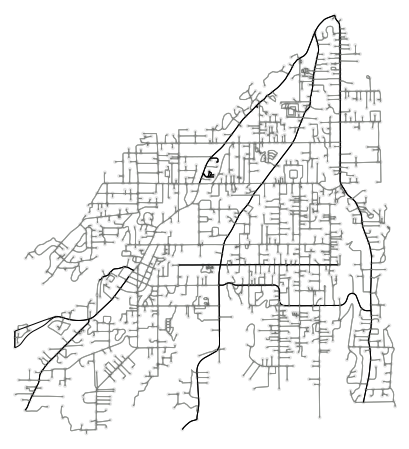

In [15]:
G = ox.graph_from_place('Paradise, California', network_type='drive')
G = ox.add_edge_speeds(G)
ec = ['#929591' if d < 50 else 'k' for u, v, d in G.edges(data='speed_kph')]
fig, ax = ox.plot_graph(G, node_alpha=0.1, edge_color=ec,
                                     bgcolor='#FFFFFF',
                        node_color='#000000')

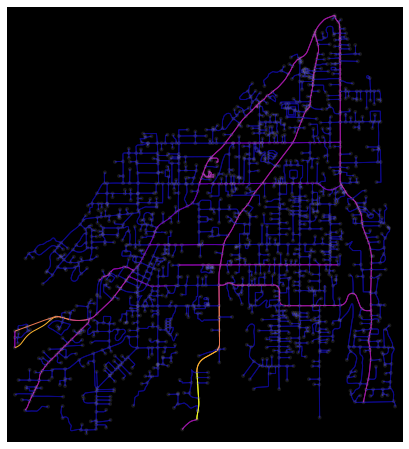

In [16]:
G = ox.graph_from_place('Paradise, California', network_type='drive')
G = ox.add_edge_speeds(G)
ec = ox.plot.get_edge_colors_by_attr(G, 'speed_kph', cmap='plasma')
fig, ax = ox.plot_graph(G, node_alpha=0.1, edge_color=ec, bgcolor='k')

- [citation](https://stackoverflow.com/questions/65970051/plot-edges-conditional-on-speed-limit-in-pythons-osmnx)

- https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb

- Convert `x`, `y` coordinates to lat and long

In [17]:
edges_35mph = ox.project_gdf(edges_35mph, to_latlong=True)
edges_35mph

osmid        name    highway  oneway   length  \
u    v    key                                                      
13   16   0    882480954  Clark Road  secondary   False  166.719   
15   28   0    538864405   Neal Road   tertiary   False  210.253   
16   36   0    882480954  Clark Road  secondary   False  258.599   
     13   0    882480954  Clark Road  secondary   False  166.719   
28   40   0    538864405   Neal Road   tertiary   False  103.670   
...                  ...         ...        ...     ...      ...   
1742 1603 0     10293494  Pentz Road   tertiary   False   78.639   
1763 1062 0     30058272  Clark Road  secondary   False  107.160   
     993  0     30058272  Clark Road  secondary   False   89.315   
1773 1057 0     10293494  Pentz Road   tertiary   False   61.038   
     990  0     10293494  Pentz Road   tertiary   False  139.520   

                                                        geometry  u_original  \
u    v    key                                                                  
13   16   0    LINESTRING (-121.61285 39.72827, -121.61286 39...    86430069   
15   28   0    LINESTRING (-121.65280 39.72991, -121.65244 39...    86502136   
16   36   0    LINESTRING (-121.61263 39.72975, -121.61251 39...  5375953903   
     13   0    LINESTRING (-121.61263 39.72975, -121.61280 39...  5375953903   
28   40   0    LINESTRING (-121.65173 39.73159, -121.65122 39...    86422349   
...                                                          ...         ...   
1742 1603 0    LINESTRING (-121.57959 39.78687, -121.57959 39...    86500587   
1763 1062 0    LINESTRING (-121.60292 39.76496, -121.60286 39...    86430277   
     993  0    LINESTRING (-121.60292 39.76496, -121.60308 39...    86430277   
1773 1057 0    LINESTRING (-121.57469 39.76487, -121.57471 39...    86466048   
     990  0    LINESTRING (-121.57469 39.76487, -121.57467 39...    86466048   

               v_original  speed_kph  travel_time maxspeed     ref lanes  
u    v    key                                                             
13   16   0    5375953903       88.5          6.8   55 mph  CA 191   NaN  
15   28   0      86422349       56.3         13.4   35 mph     NaN     2  
16   36   0      86430089       88.5         10.5   55 mph  CA 191   NaN  
     13   0      86430069       88.5          6.8   55 mph  CA 191   NaN  
28   40   0      86420988       56.3          6.6   35 mph     NaN     2  
...                   ...        ...          ...      ...     ...   ...  
1742 1603 0      86473650       56.3          5.0   35 mph     NaN   NaN  
1763 1062 0      86430291       56.3          6.9   35 mph     NaN   NaN  
     993  0      86430271       56.3          5.7   35 mph     NaN   NaN  
1773 1057 0      86420503       56.3          3.9   35 mph     NaN   NaN  
     990  0      86500449       56.3          8.9   35 mph     NaN   NaN  

[439 rows x 13 columns]

### Number of streets per intersection

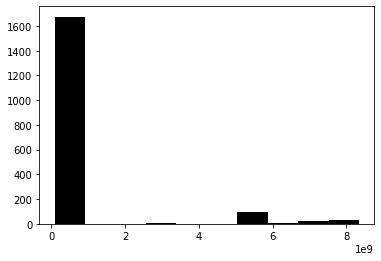

In [55]:
plt.hist(ox.utils_graph.count_streets_per_node(map),
         color='k');

### Number of lanes per street

**percent of edges and nodes with NaNs**

In [18]:
print("% of edges without lanes/street data:", gdf_edges["lanes"].isna().sum()/ gdf_edges.shape[0])
print("% of nodes without lanes/street data:", gdf_nodes["street_count"].isna().sum()/ gdf_nodes.shape[0])

% of edges without lanes/street data: 0.9643395278754395
% of nodes without lanes/street data: 0.027404921700223715


Subset columns of interest

In [19]:
gdf_edges = edges_35mph[['name','highway', 'oneway', 'length','lanes','speed_kph', 'maxspeed', 'travel_time','geometry']]

**Edges/streets with non-NaN values for the number of lanes**

In [21]:
EdgesWithLaneData = gdf_edges[gdf_edges['lanes'].notnull()]
EdgesWithLaneData.head()
# Export
EdgesWithLaneData.to_csv (r'./OSMData/Edges35WithLaneData.csv', index = False, header=True)

**Edges/streets with NaN values for the number of lanes**

In [22]:
EdgesWithoutLaneData = gdf_edges[gdf_edges['lanes'].isnull()]
EdgesWithoutLaneData.head()
# Export
EdgesWithoutLaneData.to_csv (r'./OSMData/Edges35WithoutLaneData.csv', index = False, header=True)

**Nodes/instersectons with non-NaN values for the number of streets**

In [22]:
NodesWithStreetData = gdf_nodes[gdf_nodes['street_count'].notnull()]
NodesWithStreetData.head()
# Export
# NodesWithStreetData.to_csv (r'./OSMData/NodesWithStreetData.csv', index = False, header=True)

osmid_original             y              x  street_count         lon  \
osmid                                                                         
0           86435684  4.398208e+06  616678.276142           1.0 -121.638553   
1           86556378  4.398275e+06  616566.852713           3.0 -121.639841   
2           86435682  4.398272e+06  616677.301700           4.0 -121.638553   
3           86471917  4.398316e+06  618587.235226           3.0 -121.616265   
4           86477502  4.398330e+06  617069.208938           1.0 -121.633971   

             lat highway                        geometry  
osmid                                                     
0      39.725777     NaN  POINT (616678.276 4398207.926)  
1      39.726392     NaN  POINT (616566.853 4398274.510)  
2      39.726355     NaN  POINT (616677.302 4398272.079)  
3      39.726484     NaN  POINT (618587.235 4398315.604)  
4      39.726821     NaN  POINT (617069.209 4398329.775)

**Nodes/instersectons with non-NaN values for the number of streets**

In [23]:
NodesWithoutStreetData = gdf_nodes[gdf_nodes['street_count'].isnull()]
NodesWithoutStreetData.head()
# Export
# NodesWithoutStreetData.to_csv (r'./OSMData/NodesWithoutStreetData.csv', index = False, header=True)

osmid_original             y              x  \
osmid                                                                    
54                 [86519921, 4289644960]  4.399024e+06  618491.812609   
95                 [8342728357, 86520701]  4.399363e+06  617126.807945   
149    [5383263025, 86458473, 5383263024]  4.399596e+06  618077.657212   
182                [8184820527, 86502213]  4.399870e+06  616161.186170   
223                  [86461513, 86475432]  4.399739e+06  618177.324169   

       street_count  lon  lat highway                        geometry  
osmid                                                                  
54              NaN  NaN  NaN     NaN  POINT (618491.813 4399023.661)  
95              NaN  NaN  NaN     NaN  POINT (617126.808 4399363.009)  
149             NaN  NaN  NaN     NaN  POINT (618077.657 4399596.113)  
182             NaN  NaN  NaN     NaN  POINT (616161.186 4399869.762)  
223             NaN  NaN  NaN     NaN  POINT (618177.324 4399739.007)

**Visualize street direction**

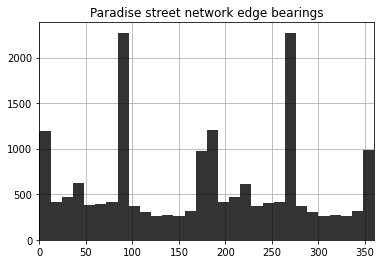

In [24]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(map)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8, color='k')
ax.set_xlim(0, 360)
ax.set_title('Paradise street network edge bearings')
plt.show()

**Polar chart**

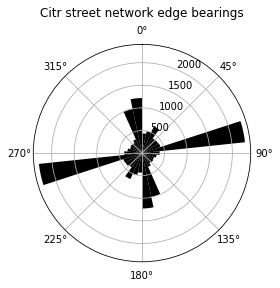

In [25]:
# polar plot
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0, color='k')
ax.set_title('Citr street network edge bearings', y=1.1)
plt.show()

### Export data as GeoJSON file

- [graph to shape, geo, and graph](https://networkx.org/documentation/latest/auto_examples/geospatial/plot_osmnx.html)
- [df to GeoJSON](https://geoffboeing.com/2015/10/exporting-python-data-geojson/)

In [74]:
# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
ox.save_graph_geopackage(G, filepath="./graph.gpkg")
ox.save_graphml(G, filepath="./graph.graphml")

#### Grab shape files for cities powered by PG&E

import shapefiles

- Entire region

In [27]:
# import shapefile using geopandas
PGnE = pd.read_csv('/Users/davidlinnardwheeler/Desktop/Desktop - David’s MacBook Pro/DataScience/BERKELEY/W210/egress_est/Trials/PG&ECities/PGnECities.csv')

In [29]:
PGnE.head()

Name  Type   County Population2010  LandArea_SqMi   km2  \
0          Alameda  City  Alameda         73,812          10.61  27.5   
1           Albany  City  Alameda         18,539           1.79   4.6   
2      Amador City  City   Amador            185           0.31   0.8   
3  American Canyon  City     Napa         19,454           4.84  12.5   
4         Anderson  City   Shasta          9,932           6.37  16.5   

     Incorporated  Unknown  
0  April 19, 1854      3.0  
1       22-Sep-08      4.0  
2        2-Jun-15      8.0  
3        1-Jan-92      9.0  
4       16-Jan-56     11.0

- Add ", California" to each city name

In [35]:
PGnE["Name"] = PGnE["Name"].astype(str) + ", California"

- sanity check

In [150]:
PGnE[["Name"]]

Name
0            Alameda, California
1             Albany, California
2        Amador City, California
3    American Canyon, California
4           Anderson, California
..                           ...
690        Mad River, California
691           Salyer, California
692   Trinity Center, California
693      Weaverville, California
694            Zenia, California

[695 rows x 1 columns]

In [104]:
os.getcwd()
os.chdir('/Users/davidlinnardwheeler/Desktop/Desktop - David’s MacBook Pro/DataScience/BERKELEY/W210/egress_est/Trials/PG&ECities/GeoJSONS')
os.getcwd()

'/Users/davidlinnardwheeler/Desktop/Desktop - David’s MacBook Pro/DataScience/BERKELEY/W210/egress_est/Trials/PG&ECities/GeoJSONS'

- Create GeoPandas DataFrames

> - [citation](https://geoffboeing.com/2015/10/exporting-python-data-geojson/)

In [121]:
# def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
#     geojson = {'type':'FeatureCollection', 'features':[]}
#     for _, row in df.iterrows():
#         feature = {'type':'Feature',
#                    'properties':{},
#                    'geometry':{'type':'Point',
#                                'coordinates':[]}}
#         feature['geometry']['coordinates'] = [row[lon],row[lat]]
#         for prop in properties:
#             feature['properties'][prop] = row[prop]
#         geojson['features'].append(feature)
#     return geojson

- Convert to GeoJSON!

In [132]:
# Instantiate empty vector
gdfs = []

# For each city in the column of PG&E Names
for city in PGnE["Name"]:
    # Attempt to...
    try: 
        # Convert to geopandas dataframe
        gdfs = ox.geocode_to_gdf(city)
        # Convert geopandas dataframe to GeoJSON file
        gdfs.to_file(filename='./{}.geojson'.format(city), driver='GeoJSON')
#         GF = df_to_geojson(gdfs, gdfs.columns, lat="lat", lon="lon") 
#         GF.to_json()
#         # And save as        
#         output_filename = '{}'.format(city)
#         with open(output_filename, 'wb') as output_file:
#             output_file.write('var dataset = ')
#             json.dump(GJ, output_file, indent=2)
            
    except ValueError:
        pass  

- From how many cities do we have geoJSON files?

In [152]:
# Instantiate counter
count = 0
# Set directory
d = '/Users/davidlinnardwheeler/Desktop/Desktop - David’s MacBook Pro/DataScience/BERKELEY/W210/egress_est/Trials/PG&ECities/GeoJSONS'
# For the paths in the directory
for path in os.listdir(d):
    # If theres a file
    if os.path.isfile(os.path.join(d, path)):
        # Add 1
        count += 1
# Report
print("GeoJSON files for",count, "of",len(PGnE[["Name"]]), "cities serviced by PG&E" )

GeoJSON files for 435 of 695 cities serviced by PG&E


- Confirm that files are readable

In [130]:
f = gpd.read_file('Amador City, California.geojson')

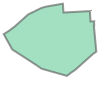

In [131]:
f['geometry'][0]

- Individual cities

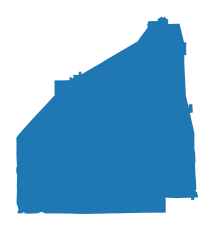

In [33]:
ox.config(use_cache=True, log_console=True)
gdf = ox.geocode_to_gdf('Paradise, California')
gdf.to_file('ParadiseCA')
ax = ox.project_gdf(gdf).plot()
_ = ax.axis('off')

- Notes
 - get geoJSON files for [all cities served by PG&E](https://www.pge.com/tariffs/assets/pdf/tariffbook/GAS_MAPS_Service_Area_Map.pdf)
 - filter out roads < 35 mph
 - color roads by speedway (x.plot.get_edge_colors_by_attr)